In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from data_prep import data_prep
import get_model
import utils

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
dfreal = pd.read_csv('dataset\Biomass_Private.csv')

data_loader = data_prep(image=False)
dfbio = data_loader.dfbio

In [3]:
model = get_model.LSTM_3(dfbio)
X_train, y_train, X_val, y_val = model.prepare_data(fit=False)
history = model.eval(X_train, y_train, X_val, y_val)

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 142.1199 - val_loss: 160.4520 - lr: 0.0010
Epoch 2/300
1/1 [==============================] - 0s 90ms/step - loss: 142.4973 - val_loss: 159.2572 - lr: 0.0010
Epoch 3/300
1/1 [==============================] - 0s 92ms/step - loss: 141.2653 - val_loss: 157.9585 - lr: 0.0010
Epoch 4/300
1/1 [==============================] - 0s 83ms/step - loss: 140.0631 - val_loss: 156.4867 - lr: 0.0010
Epoch 5/300
1/1 [==============================] - 0s 106ms/step - loss: 138.8370 - val_loss: 155.1753 - lr: 0.0010
Epoch 6/300
1/1 [==============================] - 0s 91ms/step - loss: 136.9358 - val_loss: 151.3682 - lr: 0.0010
Epoch 7/300
1/1 [==============================] - 0s 97ms/step - loss: 134.0916 - val_loss: 146.7745 - lr: 0.0010
Epoch 8/300
1/1 [==============================] - 0s 100ms/step - loss: 128.2696 - val_loss: 144.6888 - lr: 0.0010
Epoch 9/300
1/1 [==============================] - 0s 96ms/step - loss: 127.2228

100 200 6 batch : 42.637  
100 200 6 batch lr 0.001 : 35.187 

In [ ]:
model = get_model.LSTM_3(dfbio)
X_train, y_train = model.prepare_data(fit=True)
history = model.fit(X_train, y_train)

In [ ]:
utils.save_model(model.model, 'LSTM_3_300_40.899')

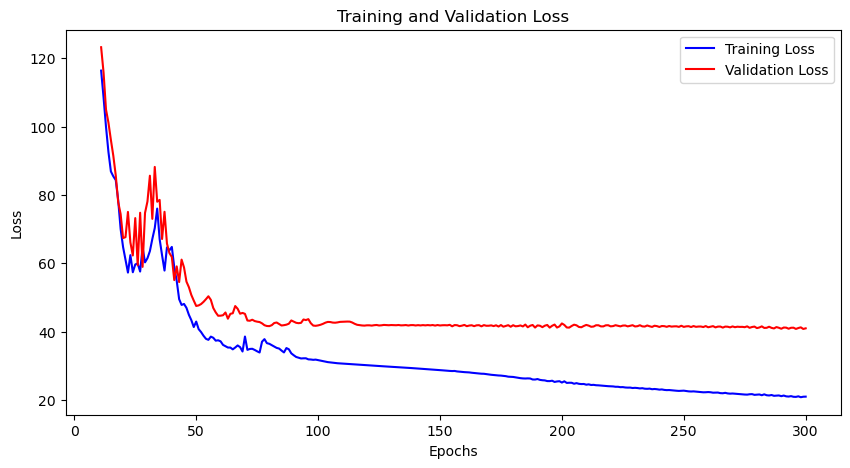

In [4]:
utils.plot_loss(history, val=True)

In [ ]:
_, preds = model.predict()

In [ ]:
np.sum(preds['2018']), np.sum(preds['2019'])

In [ ]:
dfreal['2018'].sum(), dfreal['2019'].sum()

In [ ]:
utils.real_eval(dfreal, preds)